# This is our Task
● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
● As a business manager, try to find out the weak areas where you can
work to make more profit.
● What all business problems you can derive by exploring the data?

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)

cf.go_offline()

In [2]:
d = pd.read_csv("SampleSuperstore.csv")

In [3]:
d

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Exploratory Data Analysis
Checking the value in the columns

In [4]:
#checking the type of data available in columns
d['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [5]:
d['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [6]:
d['Country'].unique()

array(['United States'], dtype=object)

In [7]:
d['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [8]:
d['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [9]:
d['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [10]:
d['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [11]:
unique_values = {}
for col in d.columns:
    if col == "Country"or col == "State"or col == "City" or col == "Postal Code"or col == "Sales" or col == "Quantity" or col == "Discount" or col == "Profit":
        continue
    unique_values[col] = d[col].unique()
print(unique_values)

{'Ship Mode': array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object), 'Segment': array(['Consumer', 'Corporate', 'Home Office'], dtype=object), 'Region': array(['South', 'West', 'Central', 'East'], dtype=object), 'Category': array(['Furniture', 'Office Supplies', 'Technology'], dtype=object), 'Sub-Category': array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)}


In [12]:
#to check is there any null values
d.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
#its returns all details about coloumn
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<AxesSubplot:>

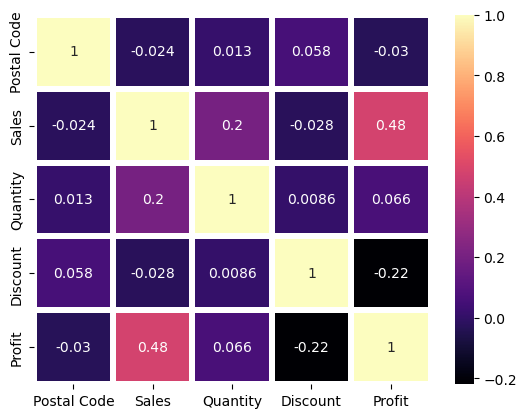

In [157]:
#heat map is used to see the corlation betwee the data
sns.heatmap(d.corr(), annot=True, cmap = "magma", linecolor = "white", linewidth = "3")

In [15]:
d

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [16]:
d['Profit'].sum()

286397.0217

# Break the Dataset into two problems to easyly understand
This may increase the understanding of problems better.
we going to work on the losses in profit.
so Split the data by loss in #Profit.

In [17]:
loss = d[d['Profit']<0]
profit = d[d['Profit']>0]

In [18]:
profit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200


In [19]:
profit['Profit'].mean()

54.917883767684025

Average profit is 54.91 dollers per order on profit data

In [20]:
loss

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [21]:
loss['Profit'].mean()
loss['Profit'].sum()

-156131.2857

Average profit is -83.44 dollers per order on loss data and overall loss is -156131.28

<AxesSubplot:xlabel='Segment', ylabel='count'>

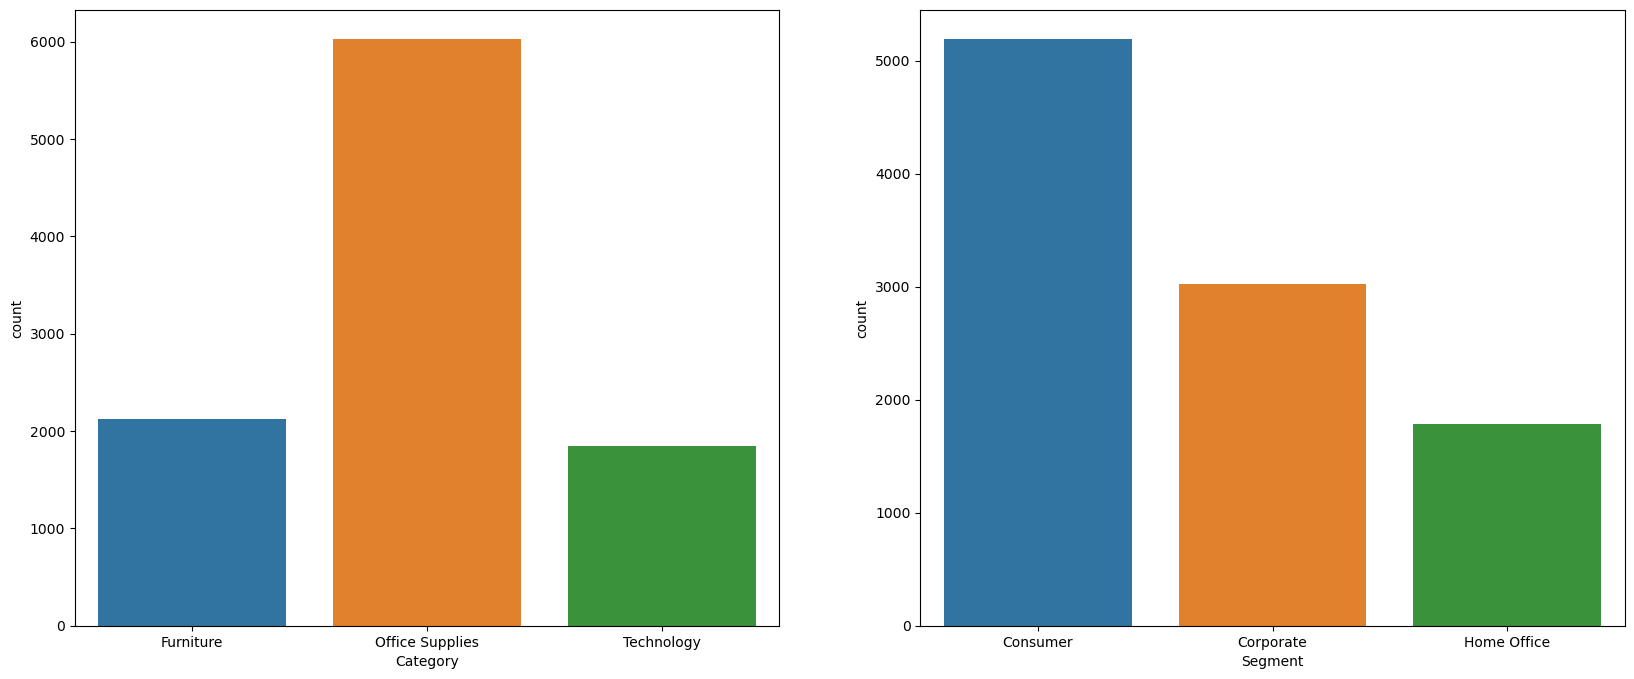

In [144]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.countplot(data = d, x = 'Category')
plt.subplot(1,2,2)
sns.countplot(data = d, x = "Segment")

# Lets see count of order as per region in loss data

<AxesSubplot:xlabel='Region', ylabel='count'>

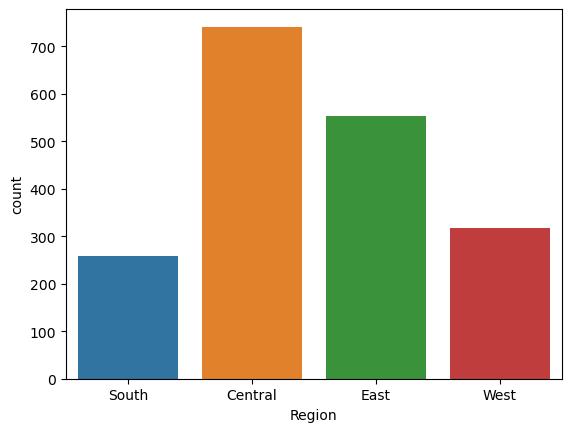

In [23]:
sns.countplot(data = loss, x = 'Region')

# Lets check total loss and average loss by Region 

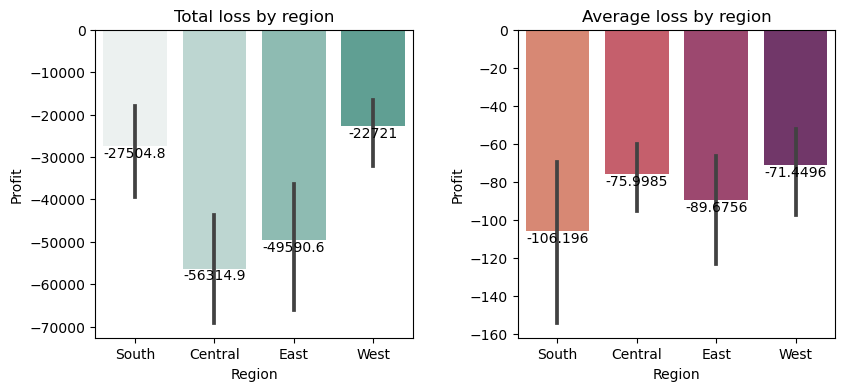

In [24]:
plt.figure(figsize=(15, 4))
plt.subplots_adjust(wspace=0.33) 
plt.subplot(1,3,1)
plt.title('Total loss by region')
x = sns.barplot(data = loss, x= 'Region',y='Profit',estimator=np.sum,palette = "light:#5A9")
for i in x.containers:
    x.bar_label(i,)
plt.subplot(1,3,2)
plt.title('Average loss by region')
y = sns.barplot(data = loss, x= 'Region',y='Profit', palette = "flare")
for i in y.containers:
    y.bar_label(i,)

The region with the highest loss profit is hear Central.

# Lets check loss by region with Category and Segments

<AxesSubplot:xlabel='Region', ylabel='Segment'>

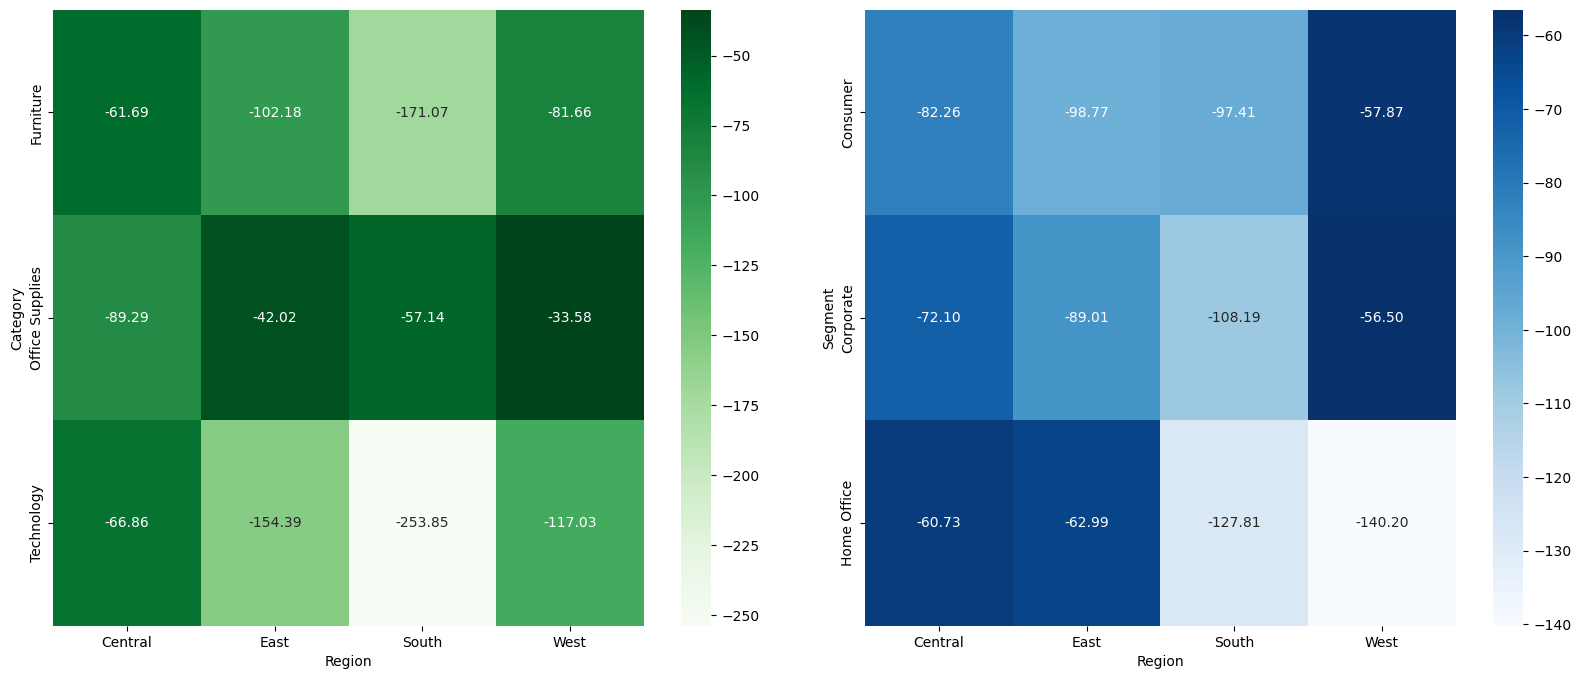

In [25]:
plt.figure(figsize=(20, 8))
plt.subplots_adjust(wspace=0.1)
losspivot1 = loss.pivot_table(values='Profit',index='Category',columns='Region')
plt.subplot(1,2,1)
sns.heatmap(losspivot1, annot = True, fmt = ".2f", cmap = "Greens")
losspivot2 = loss.pivot_table(values='Profit',index='Segment',columns='Region')
plt.subplot(1,2,2)
sns.heatmap(losspivot2, annot = True, fmt = ".2f", cmap = "Blues")

# Comparing the pattern of loss and profit datas

<AxesSubplot:xlabel='Region', ylabel='Category'>

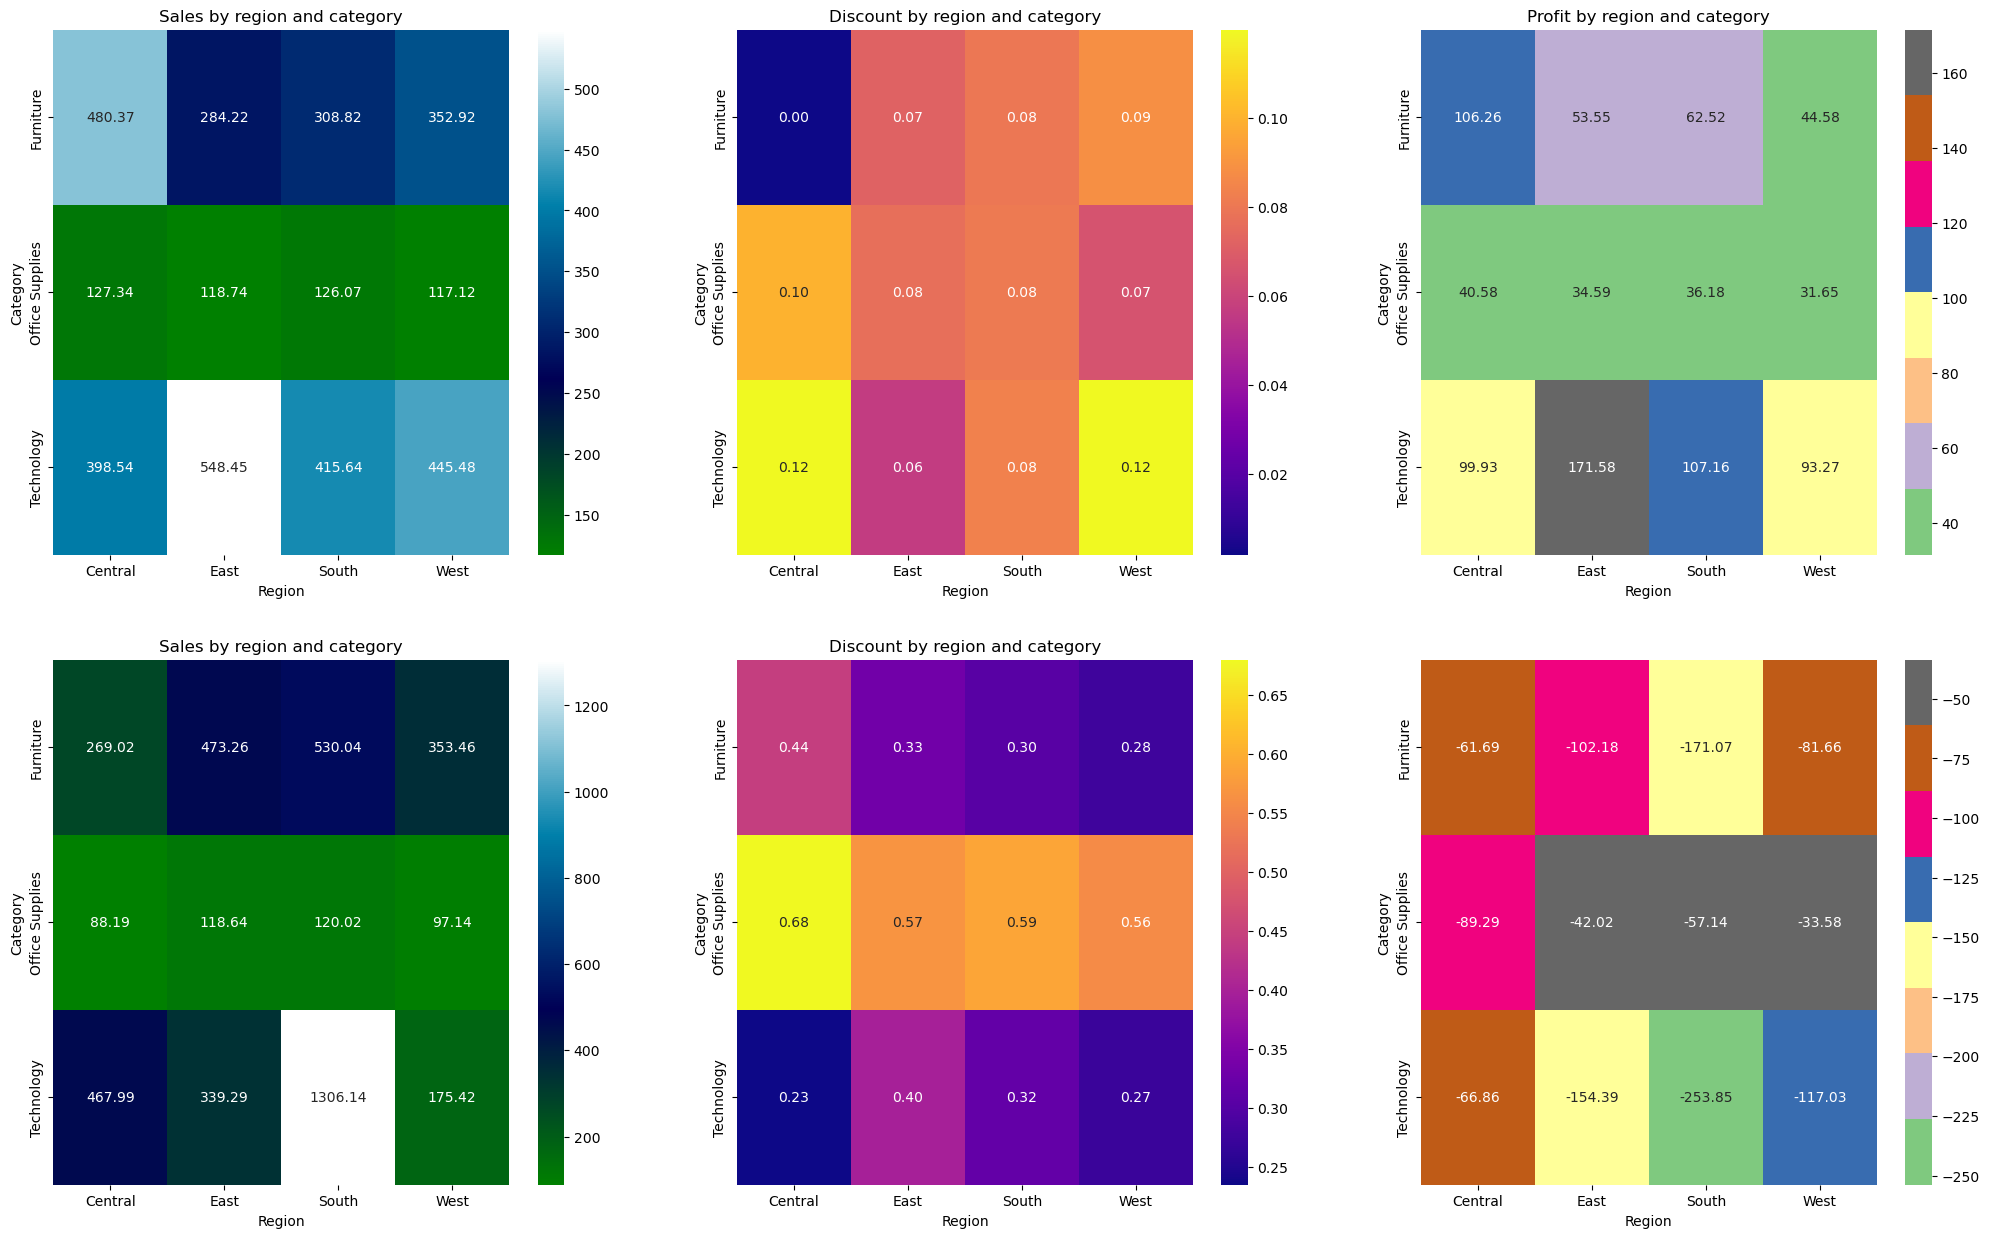

In [160]:
fig, axes = plt.subplots(2,3,figsize=(25, 15))

datapivot = profit.pivot_table(values='Sales',index='Category',columns='Region')
sns.heatmap(datapivot, annot = True,fmt = ".2f", cmap = "ocean",ax=axes[0,0])
axes[0,0].set_title("Sales by region and category")

datapivot = profit.pivot_table(values='Discount',index='Category',columns='Region')
sns.heatmap(datapivot, annot = True, fmt = ".2f", cmap = "plasma",ax=axes[0,1])
axes[0,1].set_title("Discount by region and category")

datapivot = profit.pivot_table(values='Profit',index='Category',columns='Region')
sns.heatmap(datapivot, annot = True, fmt = ".2f", cmap = "Accent",ax=axes[0,2])
axes[0,2].set_title("Profit by region and category")

datapivot = loss.pivot_table(values='Sales',index='Category',columns='Region')
sns.heatmap(datapivot, annot = True,fmt = ".2f", cmap = "ocean",ax=axes[1,0])
axes[1,0].set_title("Sales by region and category")

datapivot = loss.pivot_table(values='Discount',index='Category',columns='Region')
sns.heatmap(datapivot, annot = True, fmt = ".2f", cmap = "plasma",ax=axes[1,1])
axes[1,1].set_title("Discount by region and category")

datapivot = loss.pivot_table(values='Profit',index='Category',columns='Region')
sns.heatmap(datapivot, annot = True, fmt = ".2f", cmap = "Accent",ax=axes[1,2])


In [27]:
print("---------------------grouped loss data-------------------------")
grouped_data_for_loss = loss.groupby(["Region"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_loss)
print("---------------------grouped profit data-------------------------")
grouped_data_for_profit = profit.groupby(["Region"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_profit)
print("---------------------grouped all data-------------------------")
grouped_data_for_data = d.groupby(["Region"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_data)

---------------------grouped loss data-------------------------
               Sales      Profit  Discount
Region                                    
Central  141282.6588 -56314.8850  0.549447
East     160864.0120 -49590.6075  0.446835
South     91635.1850 -27504.8323  0.491699
West      74925.2990 -22720.9609  0.371541
---------------------grouped profit data-------------------------
               Sales       Profit  Discount
Region                                     
Central  355822.9170   96021.2475  0.094780
East     509215.9260  141113.3875  0.072276
South    294021.3920   74254.2626  0.081454
West     641746.6235  131139.4098  0.080283
---------------------grouped all data-------------------------
               Sales       Profit  Discount
Region                                     
Central  501239.8908   39706.3625  0.240353
East     678781.2400   91522.7800  0.145365
South    391721.9050   46749.4303  0.147253
West     725457.8245  108418.4489  0.109335


In [28]:
print("---------------------grouped loss data-------------------------")
grouped_data_for_loss = loss.groupby(["Category"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_loss)
print("---------------------grouped profit data-------------------------")
grouped_data_for_profit = profit.groupby(["Category"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_profit)
print("---------------------grouped all data-------------------------")
grouped_data_for_data = d.groupby(["Category"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_data)

---------------------grouped loss data-------------------------
                       Sales      Profit  Discount
Category                                          
Furniture        257885.5868 -60936.1090  0.367143
Office Supplies   91608.6750 -56615.2585  0.617607
Technology       119212.8930 -38579.9182  0.333579
---------------------grouped profit data-------------------------
                       Sales       Profit  Discount
Category                                           
Furniture        465116.9615   79387.3818  0.071943
Office Supplies  618988.7490  179106.0593  0.078341
Technology       716701.1480  184034.8663  0.097775
---------------------grouped all data-------------------------
                       Sales       Profit  Discount
Category                                           
Furniture        741999.7953   18451.2728  0.173923
Office Supplies  719047.0320  122490.8008  0.157285
Technology       836154.0330  145454.9481  0.132323


In [29]:
gdsloss = loss.groupby(["Region","State"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(gdsloss)

                              Sales      Profit  Discount
Region  State                                            
Central Illinois         38626.2020 -19501.6975  0.564314
        Texas           102656.4568 -36813.1875  0.541646
East    Connecticut        252.3570    -19.6146  0.300000
        Delaware           510.2790    -85.8963  0.300000
        Maryland           789.8030    -71.1170  0.300000
        Massachusetts     3275.3210   -566.2617  0.300000
        New Hampshire     1053.1640   -105.3164  0.300000
        New Jersey         418.2920    -51.2906  0.300000
        New York         26533.3500  -5031.1378  0.310638
        Ohio             49807.6240 -21750.0002  0.472249
        Pennsylvania     75792.2320 -21602.8515  0.460791
        Rhode Island      1758.2460   -230.1678  0.300000
        West Virginia      673.3440    -76.9536  0.300000
South   Florida          45694.1320  -8689.8295  0.501984
        North Carolina   28226.5400 -11557.9854  0.505882
        Tennes

<AxesSubplot:xlabel='State', ylabel='Profit'>

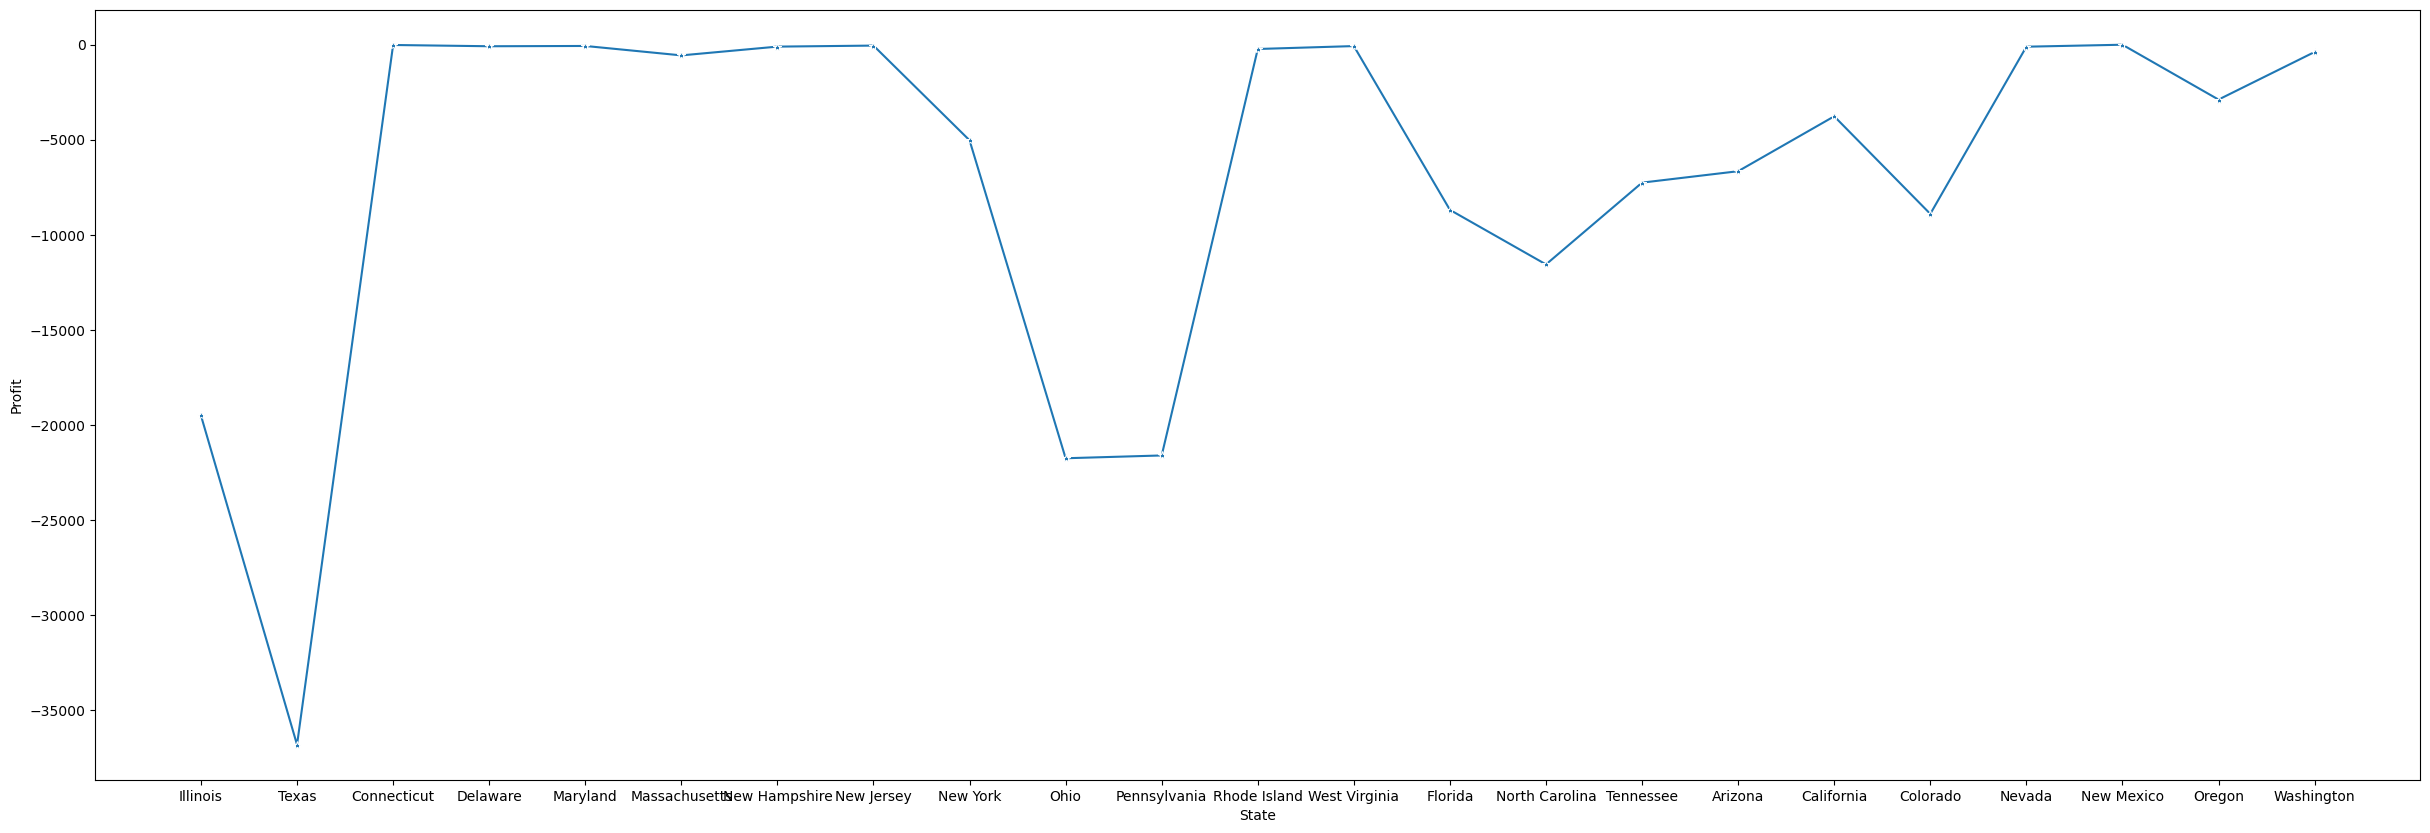

In [30]:
plt.figure(figsize=(30, 10))
sns.lineplot(data = gdsloss, x = "State", y = "Profit", marker= "*", dashes=True)

In [31]:
gdsprofit = profit.groupby(["Region","State"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(gdsprofit)

                                    Sales      Profit  Discount
Region  State                                                  
Central Illinois               40812.7250   6893.8105  0.201702
        Indiana                53549.4200  18382.9363  0.000000
        Iowa                    4579.7600   1183.8119  0.000000
        Kansas                  2914.3100    836.4435  0.000000
        Michigan               75767.8040  24463.1876  0.007087
        Minnesota              29361.3400  10823.1874  0.000000
        Missouri               22205.1500   6436.2105  0.000000
        Nebraska                7464.9300   2037.0942  0.000000
        North Dakota             919.9100    230.1497  0.000000
        Oklahoma               19683.3900   4853.9560  0.000000
        South Dakota            1315.5600    394.8283  0.000000
        Texas                  65134.0080  11083.8312  0.202231
        Wisconsin              32114.6100   8401.8004  0.000000
East    Connecticut            12579.440

In [32]:
gdlrc = loss.groupby(["Region","Category"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(gdlrc)

                              Sales      Profit  Discount
Region  Category                                         
Central Furniture        85278.5008 -19554.3653  0.443659
        Office Supplies  33072.5080 -33484.1655  0.680000
        Technology       22931.6500  -3276.3542  0.234694
East    Furniture        87079.1600 -18801.7854  0.330978
        Office Supplies  27642.0250  -9791.1899  0.566953
        Technology       46142.8270 -20997.6322  0.397794
South   Furniture        30742.0380  -9922.0246  0.302586
        Office Supplies  20402.7810  -9713.5112  0.588235
        Technology       40490.3660  -7869.2965  0.316129
West    Furniture        54785.8880 -12657.9337  0.277742
        Office Supplies  10491.3610  -3626.3919  0.556481
        Technology        9648.0500  -6436.6353  0.272727


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

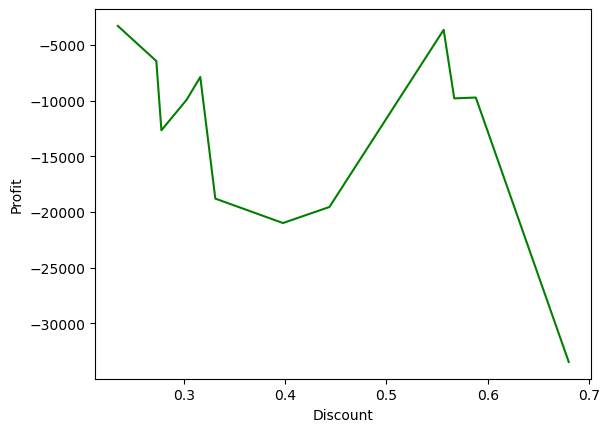

In [177]:
sns.lineplot(data = gdlrc, x = "Discount", y = 'Profit', color= "g", ci = None)

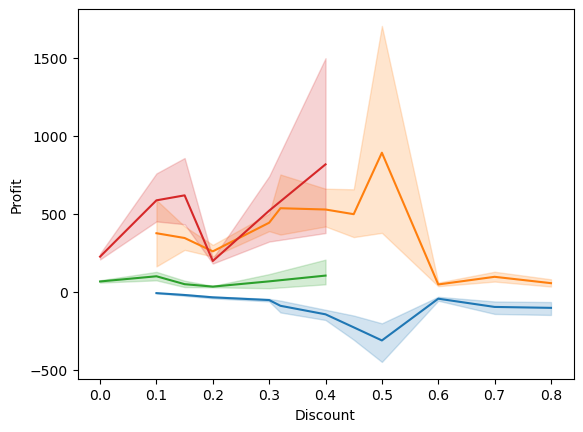

In [34]:
fig, ax = plt.subplots()
ax= sns.lineplot(x='Discount', y='Profit', data=loss)
ax1 = sns.lineplot(x='Discount', y='Sales', data=loss)
ax= sns.lineplot(x='Discount', y='Profit', data=profit)
ax1 = sns.lineplot(x='Discount', y='Sales', data=profit)

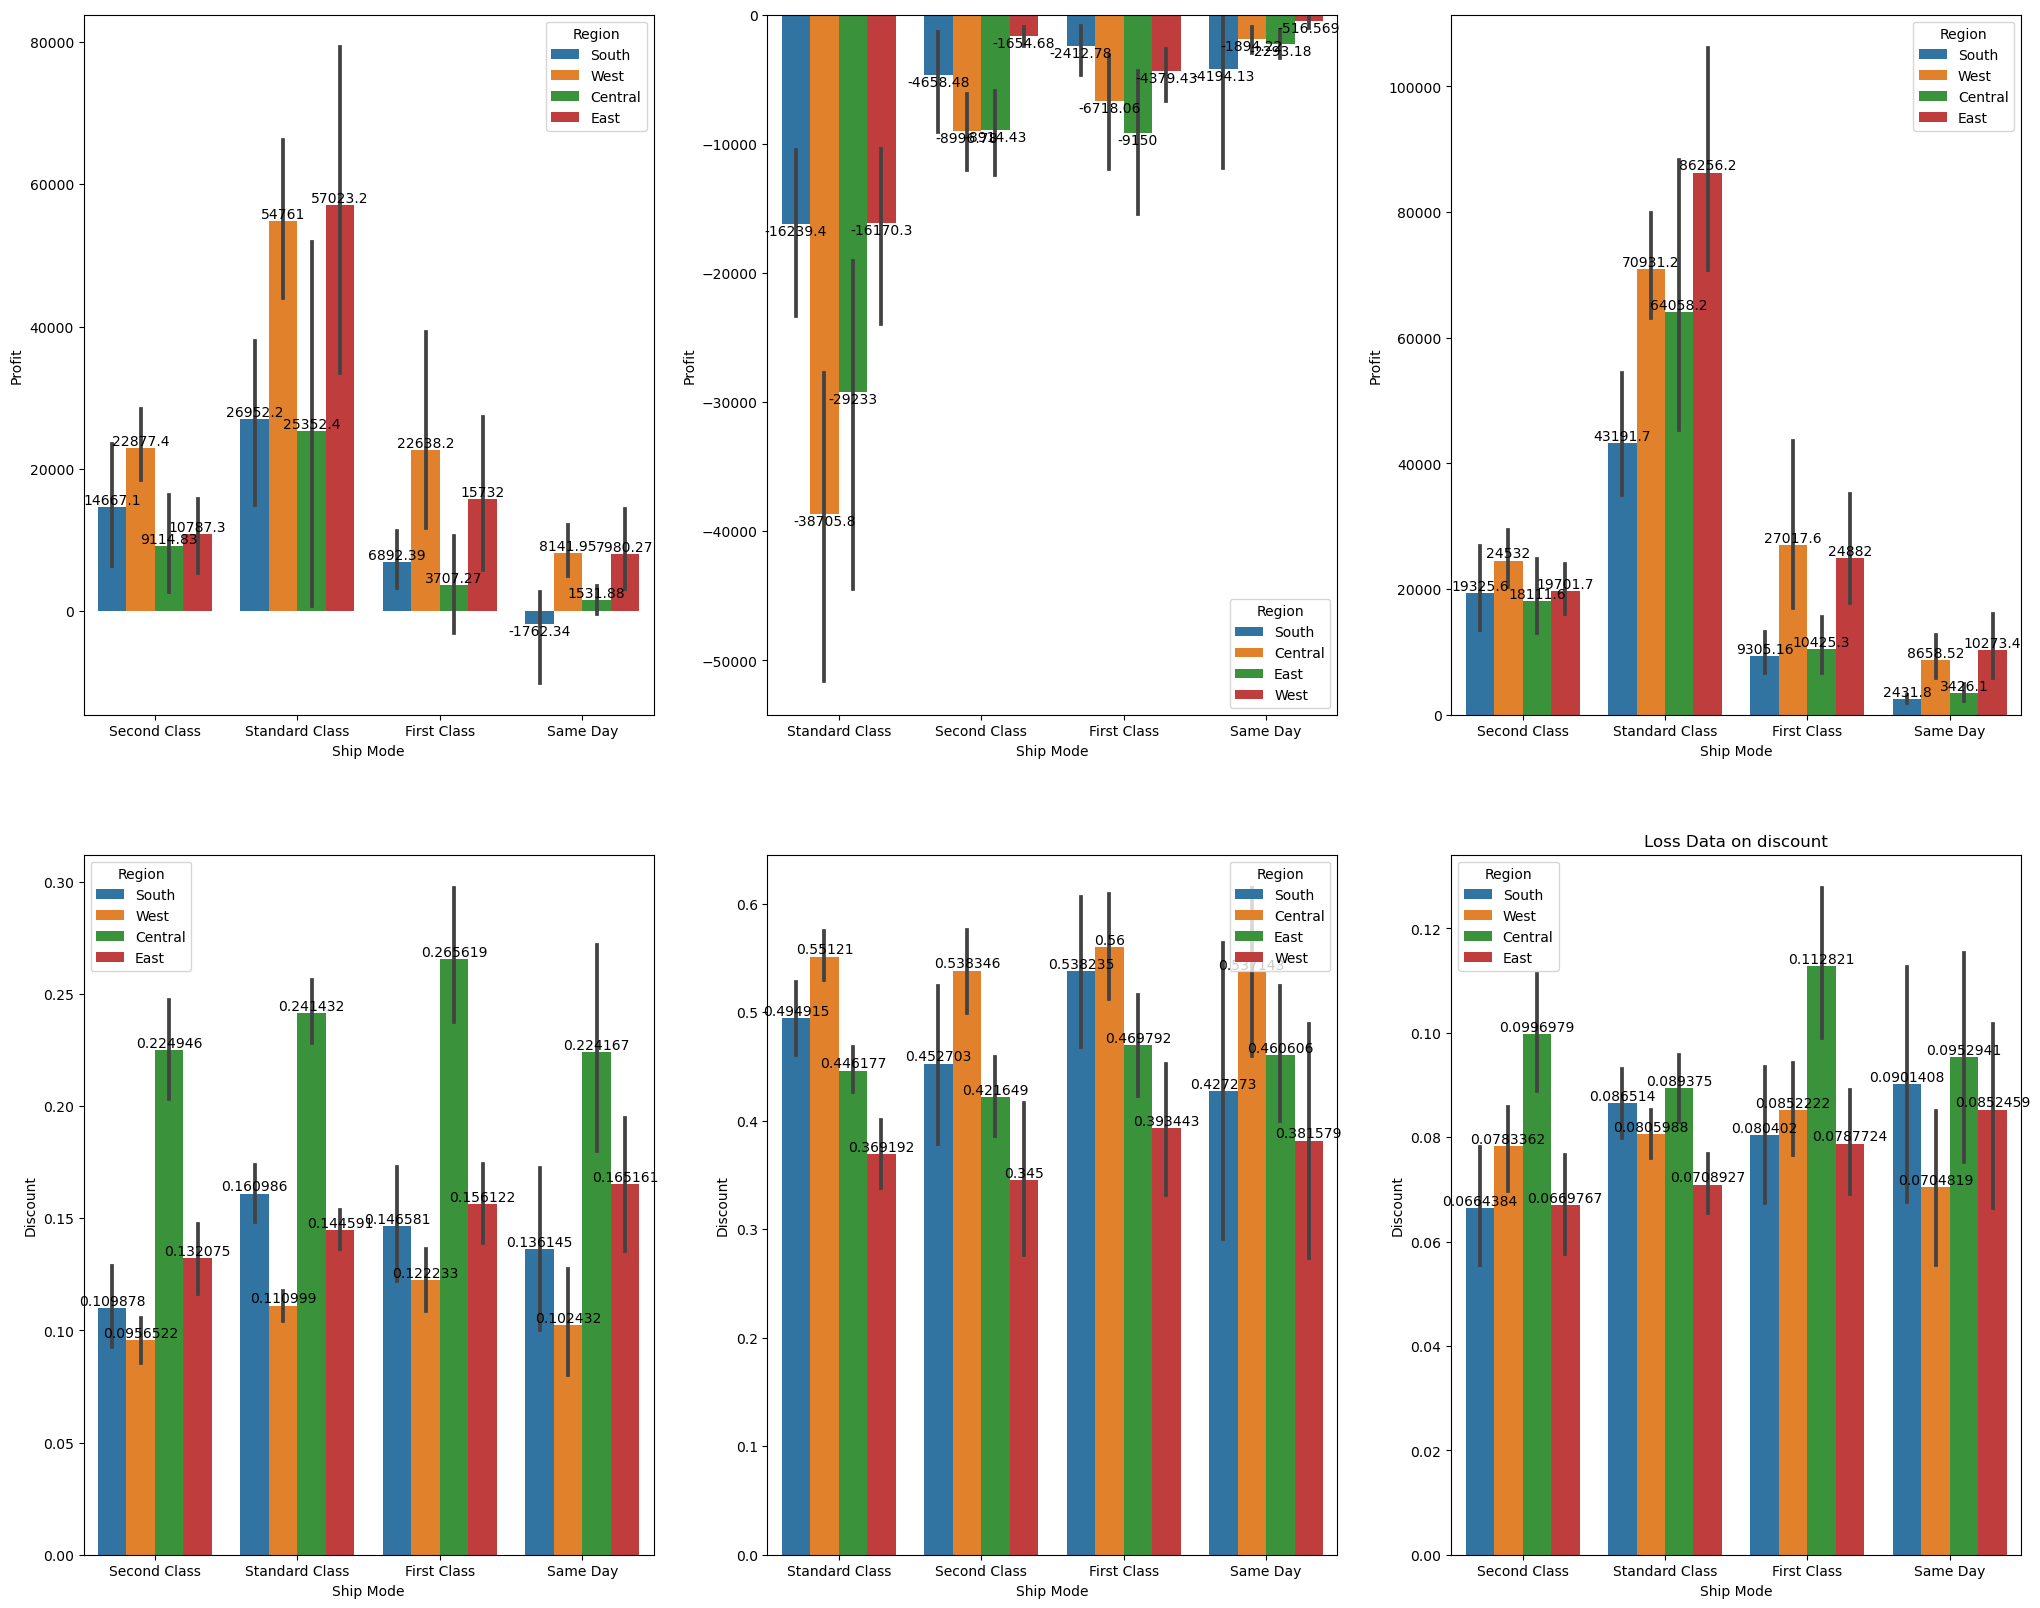

In [35]:
fig, axes = plt.subplots(2,3,figsize=(25, 20))
plt.title("Total Data on Profit")
x = sns.barplot(data=d, x='Ship Mode', y = 'Profit',hue = "Region", estimator = np.sum, ax=axes[0,0])
for i in x.containers:
    x.bar_label(i,)

plt.title("Loss Data on profit")
y = sns.barplot(data=loss, x='Ship Mode', y = 'Profit',hue = "Region", estimator = np.sum,ax=axes[0,1])
for i in y.containers:
    y.bar_label(i,)
    
plt.title("Profit Data on profit")
z = sns.barplot(data=profit, x='Ship Mode', y = 'Profit',hue = "Region", estimator = np.sum,ax=axes[0,2])
for i in z.containers:
    z.bar_label(i,)
    

plt.title("Total Data on discount")
x = sns.barplot(data=d, x='Ship Mode', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,0])
for i in x.containers:
    x.bar_label(i,)

y = sns.barplot(data=loss, x='Ship Mode', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,1])
plt.title("Loss Data on discount")
for i in y.containers:
    y.bar_label(i,)

z = sns.barplot(data=profit, x='Ship Mode', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,2])
for i in z.containers:
    z.bar_label(i,)

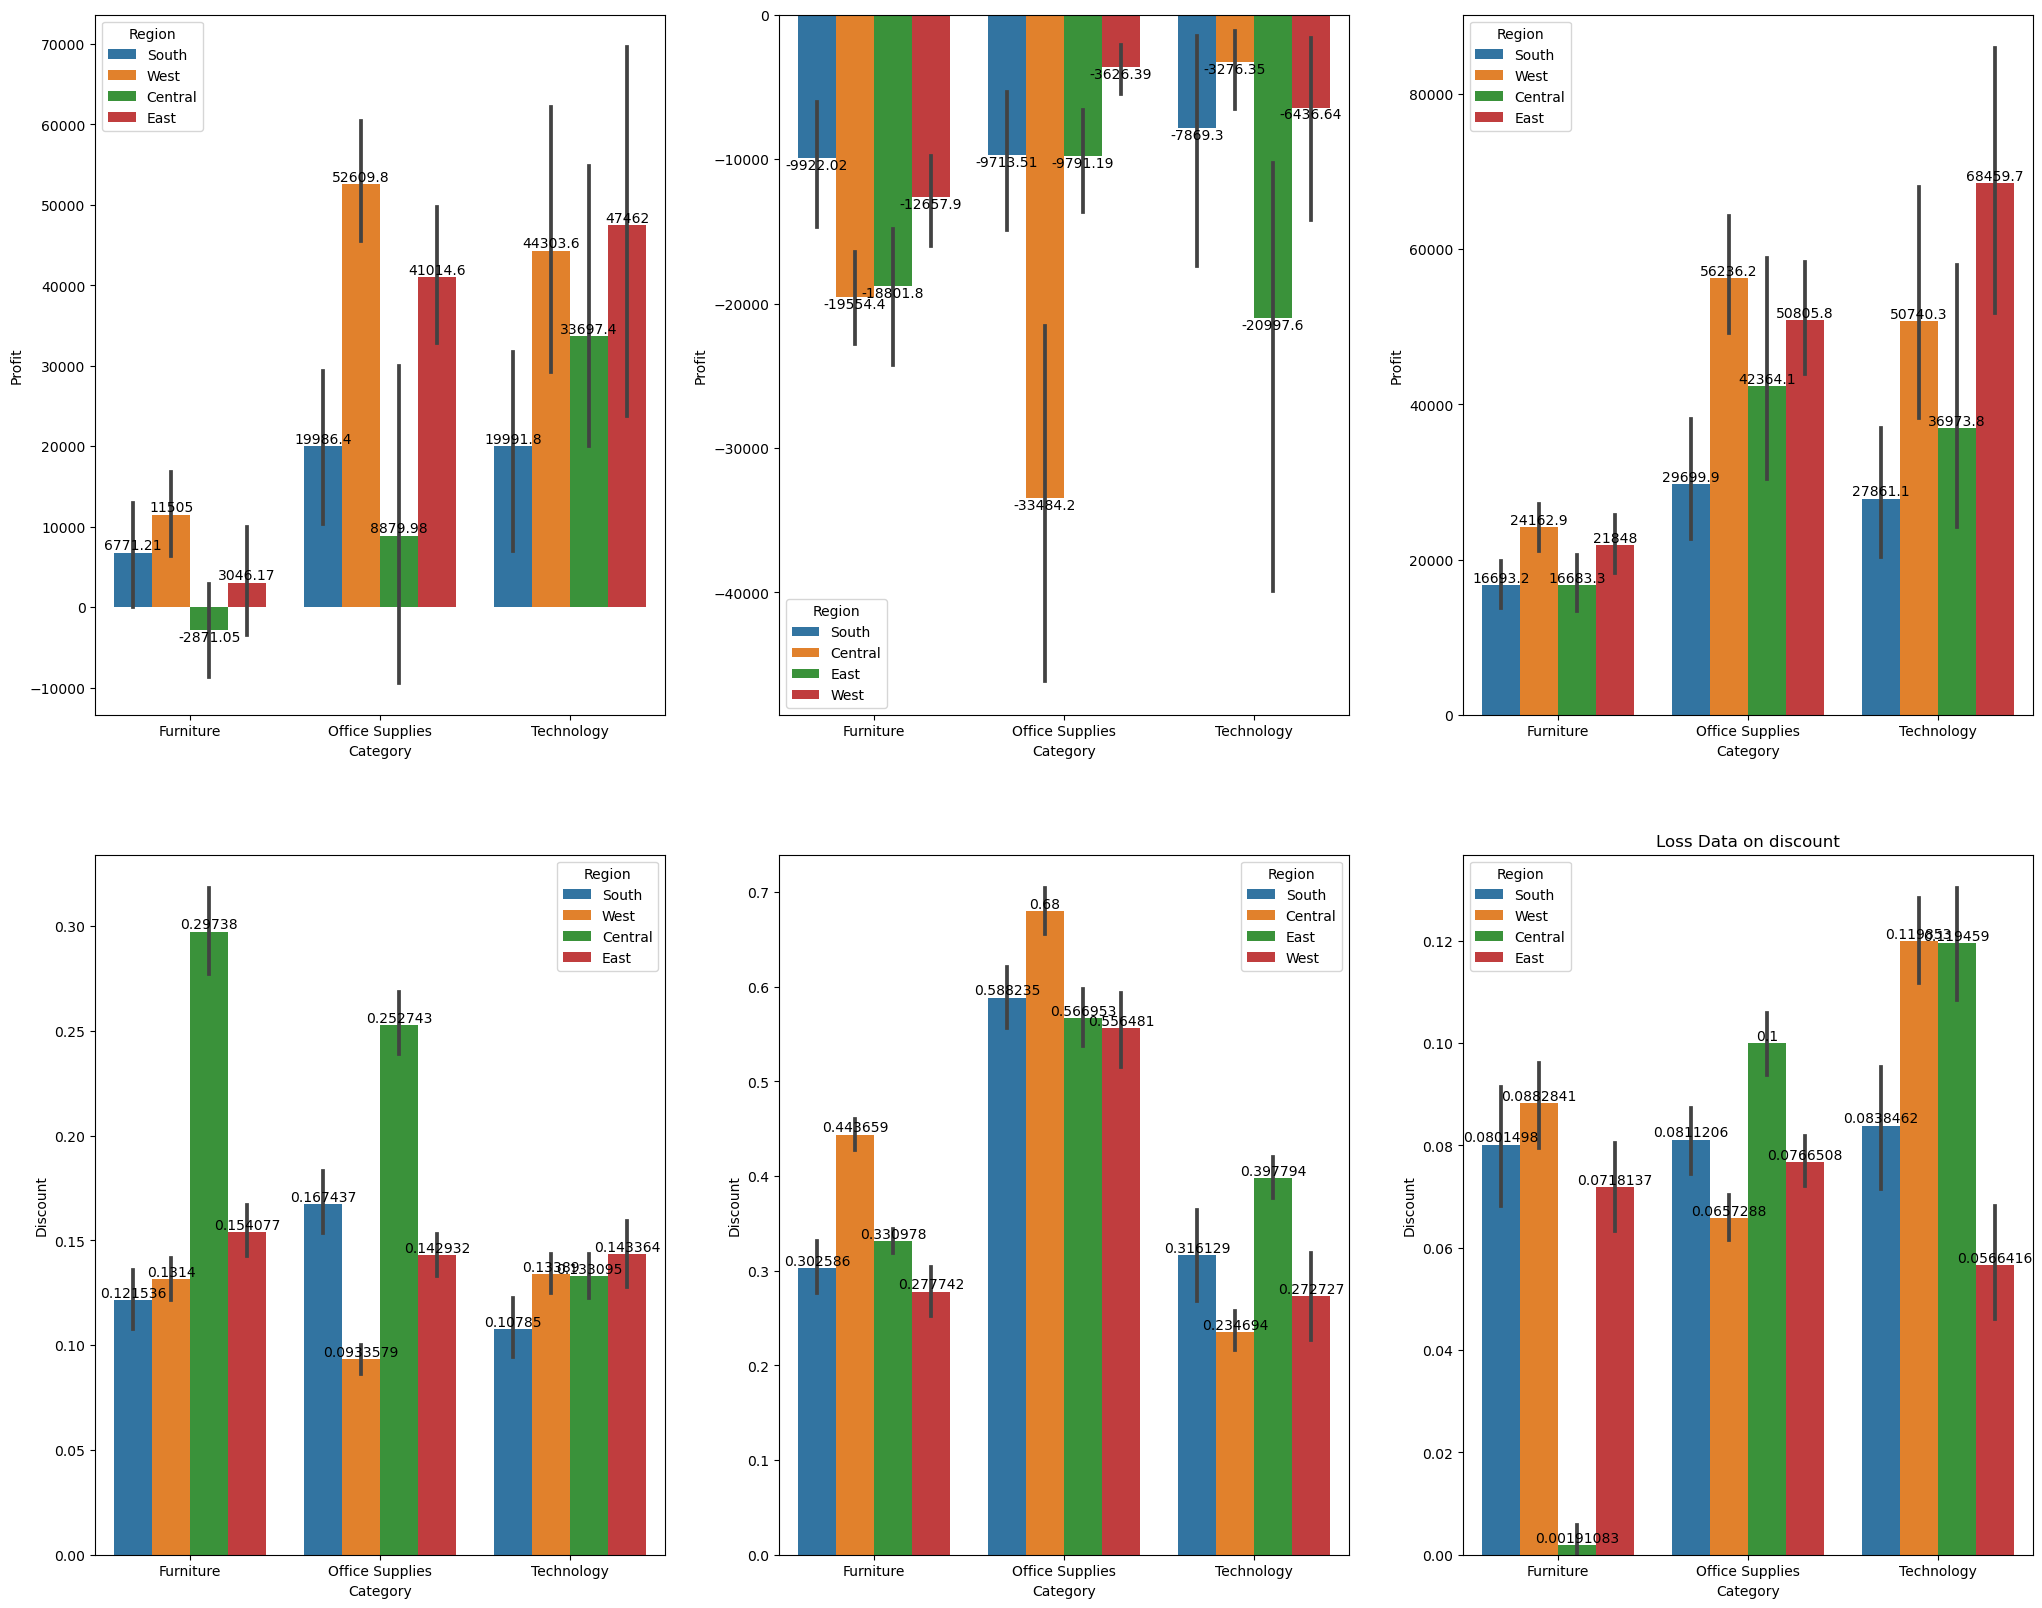

In [36]:
fig, axes = plt.subplots(2,3,figsize=(25, 20))
plt.title("Total Data on Profit")
x = sns.barplot(data=d, x='Category', y = 'Profit',hue = "Region", estimator = np.sum, ax=axes[0,0])
for i in x.containers:
    x.bar_label(i,)

plt.title("Loss Data on profit")
y = sns.barplot(data=loss, x='Category', y = 'Profit',hue = "Region", estimator = np.sum,ax=axes[0,1])
for i in y.containers:
    y.bar_label(i,)
    
plt.title("Profit Data on profit")
z = sns.barplot(data=profit, x='Category', y = 'Profit',hue = "Region", estimator = np.sum,ax=axes[0,2])
for i in z.containers:
    z.bar_label(i,)
    

plt.title("Total Data on discount")
x = sns.barplot(data=d, x='Category', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,0])
for i in x.containers:
    x.bar_label(i,)

y = sns.barplot(data=loss, x='Category', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,1])
plt.title("Loss Data on discount")
for i in y.containers:
    y.bar_label(i,)

z = sns.barplot(data=profit, x='Category', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,2])
for i in z.containers:
    z.bar_label(i,)

# lets calculate how much decrease in discount may increase the profit

In [37]:
loss

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [100]:
profit_margin_for_loss = ((loss["Profit"]/loss["Sales"])*100)**2
profit_margin_for_loss = np.sqrt(profit_margin_for_loss)
loss.insert(13,"Profit Margin", profit_margin_for_loss, True)

In [119]:
new_discount = (loss["Profit"]/loss["Sales"]) - 1
loss.insert(14,"New discount", new_discount, True)

In [130]:
New_profit = loss["Sales"] / (1 - loss["New discount"])
loss.insert(15,"New profit", New_profit, True)

In [131]:
loss

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin,New discount,New profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,40.000000,-1.400000,398.990625
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,180.000000,-2.800000,18.107895
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,150.000000,-2.500000,0.726857
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,1.428571,-1.014286,35.432908
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,54.000000,-1.540000,1213.948819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176,160.000000,-2.600000,6.218333
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936,80.000000,-1.800000,2.050714
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960,5.882353,-1.058824,331.904114
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772,2.500000,-1.025000,35.105185


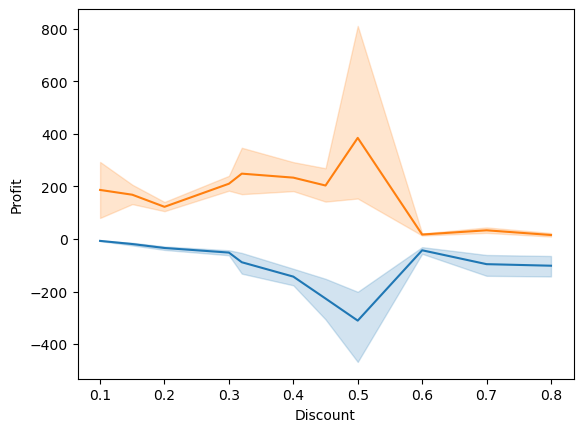

In [135]:
fig, ax = plt.subplots()
ax= sns.lineplot(x = "Discount",y='Profit', data=loss)
ax1 = sns.lineplot(x = "Discount",y='New profit', data=loss)